In [35]:
# Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.model_selection import RandomizedSearchCV, KFold, cross_val_score
from xgboost import XGBRegressor, XGBClassifier
from sklearn.metrics import mean_squared_error, mean_absolute_error

%matplotlib inline

In [2]:
# abrindo o arquivo de microdados do enem como dataframe usando o pandas
dadosEnem = pd.read_csv("Dados/MICRODADOS_ENEM_2019.csv", sep=";", encoding='ISO-8859-1')

In [3]:
dadosEnem.shape

(5095270, 136)

In [4]:
dadosEnem.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004627,2019,1506807,Santarém,15,PA,21,M,1,3,...,A,A,A,C,B,A,D,A,B,A
1,190001004628,2019,1504059,Mãe do Rio,15,PA,16,F,1,3,...,A,A,A,B,B,A,B,A,A,A
2,190001004629,2019,1505502,Paragominas,15,PA,18,F,1,1,...,B,A,A,D,B,B,D,A,C,B
3,190001004630,2019,1507706,São Sebastião da Boa Vista,15,PA,23,M,0,3,...,A,A,A,C,A,A,D,A,A,A
4,190001004631,2019,1503903,Juruti,15,PA,23,M,1,3,...,A,A,A,B,A,A,D,A,A,A


In [5]:
dadosEnem.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO',
       'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA',
       'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
       'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_GESTANTE',
       'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR',
       'IN_SEM_RECURSO', 'IN_BRAILLE', 'IN_AMPLIADA_24

In [6]:
# Selecionando as features de interesse
dadosInteresse = ['CO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'NU_IDADE',
                      'TP_SEXO', 'TP_COR_RACA', 'TP_ESCOLA', 'NU_NOTA_CN', 'NU_NOTA_CH', 
                      'NU_NOTA_REDACAO', 'NU_NOTA_MT', 'NU_NOTA_LC', 
                      'TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_MT', 'TP_PRESENCA_LC',
                      'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006',
                      'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014',
                      'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022',
                      'Q023', 'Q024', 'Q025']

In [7]:
dadosEnemInteresse = dadosEnem.filter(items=dadosInteresse)

In [8]:
# Filtrando o dataset apenas para os candidatos que estiveram presentes nas provas 
for element in ['TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_MT', 'TP_PRESENCA_LC']:
    dadosEnemInteresse = dadosEnemInteresse[dadosEnemInteresse[element]==1]

#### TratandoValores Missing

In [9]:
dadosEnemInteresse.isnull().sum(axis=0).sort_values(ascending=False)

NU_NOTA_REDACAO            1
CO_MUNICIPIO_RESIDENCIA    0
Q016                       0
Q009                       0
Q010                       0
Q011                       0
Q012                       0
Q013                       0
Q014                       0
Q015                       0
Q017                       0
Q007                       0
Q018                       0
Q019                       0
Q020                       0
Q021                       0
Q022                       0
Q023                       0
Q024                       0
Q008                       0
Q006                       0
CO_UF_RESIDENCIA           0
NU_NOTA_LC                 0
NU_IDADE                   0
TP_SEXO                    0
TP_COR_RACA                0
TP_ESCOLA                  0
NU_NOTA_CN                 0
NU_NOTA_CH                 0
NU_NOTA_MT                 0
TP_PRESENCA_CN             0
Q005                       0
TP_PRESENCA_CH             0
TP_PRESENCA_MT             0
TP_PRESENCA_LC

In [10]:
# Como só temos uma linha com valor NULL em NU_NOTA_REDACAO, iremos dropa-la pois facilitará na hora de remoção dos outliers
dadosEnemInteresse = dadosEnemInteresse.dropna()

In [11]:
# Retirando as colunas de presença do dataframe
features = ['CO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'NU_IDADE',
                      'TP_SEXO', 'TP_COR_RACA', 'TP_ESCOLA', 'NU_NOTA_CN', 'NU_NOTA_CH', 
                      'NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_REDACAO',
                      'Q001', 'Q002', 'Q003', 'Q004', 'Q005', 'Q006',
                      'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 'Q012', 'Q013', 'Q014',
                      'Q015', 'Q016', 'Q017', 'Q018', 'Q019', 'Q020', 'Q021', 'Q022',
                      'Q023', 'Q024', 'Q025']

dadosEnemInteresse = dadosEnemInteresse.filter(items=features)

#### Mapeando os tipos de variáveis

In [12]:
dadosEnemInteresse.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3702007 entries, 0 to 5095269
Data columns (total 36 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   CO_MUNICIPIO_RESIDENCIA  int64  
 1   CO_UF_RESIDENCIA         int64  
 2   NU_IDADE                 int64  
 3   TP_SEXO                  object 
 4   TP_COR_RACA              int64  
 5   TP_ESCOLA                int64  
 6   NU_NOTA_CN               float64
 7   NU_NOTA_CH               float64
 8   NU_NOTA_MT               float64
 9   NU_NOTA_LC               float64
 10  NU_NOTA_REDACAO          float64
 11  Q001                     object 
 12  Q002                     object 
 13  Q003                     object 
 14  Q004                     object 
 15  Q005                     int64  
 16  Q006                     object 
 17  Q007                     object 
 18  Q008                     object 
 19  Q009                     object 
 20  Q010                     object 
 21  Q011    

In [13]:
# Qualitativas
    # Nominais (Profissão, Sexo, Religião)
    # Ordinal (Escolaridade, Estágio da doença, classe social)

# Quantitativas
    # Discreta (Nº de filhos, Nº de acessos a plataforma)
    # Continua (Altura, Peso, Salário)

In [14]:
# Qualitativas Nominais (Profissão, Sexo, Religião, Estado Civil, Cor dos olhos, Presença ou Ausência)
# valores que expressam atributos, sem nenhum tipo de ordem

# One-Hot-Encoding 
# Quando não existe uma ordem pré estabelecida 
# (red, blue, green) -> (0, 0, 1), (0, 1, 0), (1, 0, 0) 

nominal_features = ['TP_SEXO', 'TP_COR_RACA', 'TP_ESCOLA',   
                    'Q003', 'Q004', 'Q018', 'Q020', 'Q021', 
                    'Q023', 'Q025']

In [15]:
# Qualitativas Ordinais (Escolaridade, Estágio da doença, classe social)
# valores que expressam atributos, porém com algum tipo de ordem, ou grau.

# Ordinal Encoding (quando existe uma ordem)
# (Ensino fundamental, Ensino Médio, Faculdade) -> (0, 1, 2)

ordinal_features = ['Q001', 'Q002', 'Q006', 'Q007', 'Q008', 'Q009', 'Q010', 'Q011', 
                    'Q012', 'Q013', 'Q014', 'Q015', 'Q016', 'Q017', 'Q019', 'Q022', 
                    'Q024']

In [16]:
numerical_features = ['CO_MUNICIPIO_RESIDENCIA','CO_UF_RESIDENCIA',
                      'NU_IDADE', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_LC', 'Q005']

#### Criação dos pipelines

In [17]:
# Pipeline para features nominais 
nominal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # dados Missing serão substituidos pelo mais frequente
    ('onehot', OneHotEncoder()) # (red, blue, green) -> (0, 0, 1), (0, 1, 0), (1, 0, 0) 
])

In [18]:
# Pipeline para features ordinais
ordinal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # dados Missing serão substituidos pelo mais frequente
    ('ordinal', OrdinalEncoder()) #(Ensino fundamental, Ensino Médio, Faculdade) -> (0, 1, 2)
])

In [19]:
# Pipeline para features numericas 
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')), # dados Missing serão substituidos pela mediana
])

#### Criação do pré-processador

In [20]:
preprocessor = ColumnTransformer(
                transformers=[
                    ('num', numerical_transformer, numerical_features),
                    ('cat_nom', nominal_transformer, nominal_features),
                    ('ord_nom', ordinal_transformer, ordinal_features)
                ])

#### Criação do pipeline de execução

In [21]:
# MinMaxScaler - Normalização das features
# StandardScaler - A ideia por trás do StandardScaler é que ele transformará seus dados de forma que sua distribuição tenha um valor médio 0 e desvio padrão de 1.

pipe = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('XGBR', XGBRegressor(n_estimators=1000))
])

#### Separando dos dados de treino e de teste

In [22]:
X = dadosEnemInteresse.drop(['NU_NOTA_REDACAO'], axis=1)
Y = dadosEnemInteresse.NU_NOTA_REDACAO

In [23]:
# Separando os dados de treino e teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size = 0.30, random_state = 42)

#### Treinando o modelo

In [24]:
xgbr_model = pipe.fit(X_treino, Y_treino)

#### Avaliando o modelo

In [33]:
values_predictions = pipe.predict(X_teste)

In [36]:
mean_squared_error(Y_teste, values_predictions, squared=False)

138.14257241363072

In [37]:
mean_absolute_error(Y_teste, values_predictions)

100.4506037702159

In [38]:
pd.DataFrame({'Y_teste': Y_teste,
            'Y_predictions': values_predictions})

,Y_teste,Y_predictions
3511283,820.0,816.848511
617607,0.0,352.338409
1951616,640.0,740.121033
2600481,740.0,671.582092
108439,580.0,519.395691
...,...,...
1078824,720.0,758.992981
4544154,500.0,493.222015
112144,560.0,573.163269
203532,480.0,572.802307


#### Permutation Importance

In [29]:
result = permutation_importance(pipe, X_treino, Y_treino, n_repeats=10,
                                random_state=42, n_jobs=2)

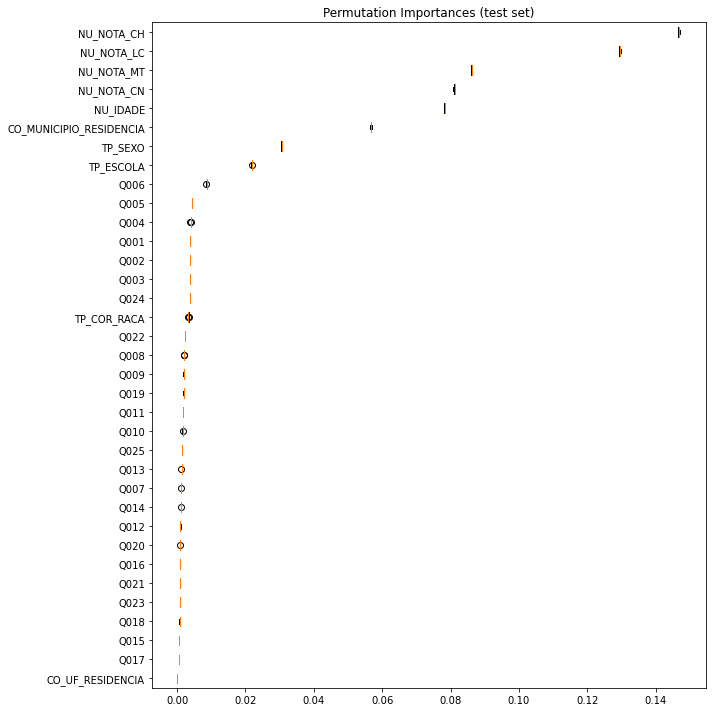

In [32]:
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots( figsize=(10,10))
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X_teste.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

In [2]:
#Q006 - Renda Mensal 
#Q005 - Número de pessoas que moram na residência
#Q004 - Ocupação da Mãe
#Q001 - Escolaridade do Pai
#Q002 - Escolaridade da mãe
#Q003 - Ocupação do Pai
#Q024 - Computador na residência
#Q022 - Telefone celular na residência
#Q008 - Quantidade de Banheiros 
#Q009 - Quantidade de Quartos